# **Imports**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import randint, uniform
import matplotlib.pyplot as plt
import numpy as np

# **Load and Preprocess Data**

In [ ]:
file_path = "/content/drive/MyDrive/Projects/emails.csv"
data = pd.read_csv(file_path, dtype={"Email No.": str})

X = data.drop(columns=["Email No.", "Prediction"])    # Excluded "Email No." column
y = data["Prediction"]

X = X.apply(pd.to_numeric, errors='coerce')           # Convert all columns to numeric
data = data.dropna(subset=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Split data into train and test sets

# **Preprocessing**

In [ ]:
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Training and Evaluation**
Hyperparameter Tuning: Grid Search and Random Search

Define reduced hyperparameter grids for efficiency

In [ ]:
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

param_grids = {
    "Logistic Regression": {
        "C": [0.1, 1, 10],
        "solver": ["lbfgs", "liblinear"]
    },
    "Decision Tree": {
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 10],
        "min_samples_leaf": [1, 4]
    },
    "Support Vector Machine": {
        "C": [0.1, 1, 10],
        "gamma": [0.1, 0.01],
        "kernel": ["linear", "rbf"]
    },
    "Random Forest": {
        "n_estimators": [100, 200],
        "max_depth": [None, 20],
        "min_samples_split": [2, 10],
        "min_samples_leaf": [1, 4]
    }
}

Define reduced hyperparameter distributions for random search

In [ ]:
# Define reduced hyperparameter distributions for random search
param_distributions = {
    "Logistic Regression": {
        "C": uniform(0.1, 10),
        "solver": ["lbfgs", "liblinear"]
    },
    "Decision Tree": {
        "max_depth": [None, 10, 20],
        "min_samples_split": randint(2, 11),
        "min_samples_leaf": randint(1, 5)
    },
    "Support Vector Machine": {
        "C": uniform(0.1, 10),
        "gamma": uniform(0.01, 0.1),
        "kernel": ["linear", "rbf"]
    },
    "Random Forest": {
        "n_estimators": randint(100, 201),
        "max_depth": [None, 20],
        "min_samples_split": randint(2, 11),
        "min_samples_leaf": randint(1, 5)
    }
}


def grid_search_tuning(classifier, param_grid, name):      # Function to perform grid search
    grid_search = GridSearchCV(classifier, param_grid, cv=3, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    return best_model

def random_search_tuning(classifier, param_distributions, name):      # Function to perform random search
    random_search = RandomizedSearchCV(classifier, param_distributions, n_iter=10, cv=3, scoring='accuracy', random_state=42)
    random_search.fit(X_train, y_train)
    best_model = random_search.best_estimator_
    return best_model


def train_and_evaluate(classifier, name, param_grid, param_distributions):      # Train and Evaluate Each Classifier
    tuned_model = grid_search_tuning(classifier, param_grid, name)              # Hyperparameter Tuning
    tuned_model = random_search_tuning(tuned_model, param_distributions, name)


    train_accuracy = accuracy_score(y_train, tuned_model.predict(X_train))      # Model Evaluation
    test_accuracy = accuracy_score(y_test, tuned_model.predict(X_test))

    train_precision = precision_score(y_train, tuned_model.predict(X_train))
    test_precision = precision_score(y_test, tuned_model.predict(X_test))

    train_recall = recall_score(y_train, tuned_model.predict(X_train))
    test_recall = recall_score(y_test, tuned_model.predict(X_test))

    train_f1 = f1_score(y_train, tuned_model.predict(X_train))
    test_f1 = f1_score(y_test, tuned_model.predict(X_test))

    return {
        "name": name,
        "train_accuracy": train_accuracy,
        "test_accuracy": test_accuracy,
        "train_precision": train_precision,
        "test_precision": test_precision,
        "train_recall": train_recall,
        "test_recall": test_recall,
        "train_f1": train_f1,
        "test_f1": test_f1
    }

# Determine the best classifier
results = []
for name, classifier in classifiers.items():
    results.append(train_and_evaluate(classifier, name, param_grids[name], param_distributions[name]))

best_algorithm = max(results, key=lambda x: x["test_accuracy"])  # Example: based on test accuracy

for result in results:
    print("\nClassifier:", result["name"])
    print("Training Accuracy:", result["train_accuracy"])
    print("Testing Accuracy:", result["test_accuracy"])
    print("Training Precision:", result["train_precision"])
    print("Testing Precision:", result["test_precision"])
    print("Training Recall:", result["train_recall"])
    print("Testing Recall:", result["test_recall"])
    print("Training F1-score:", result["train_f1"])
    print("Testing F1-score:", result["test_f1"])

print("\nBest performing algorithm:", best_algorithm["name"])

# **Plot results**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Classifier: Logistic Regression
Training Accuracy: 0.9997582789460963
Testing Accuracy: 0.9681159420289855
Training Precision: 0.9991701244813278
Testing Precision: 0.9255663430420712
Training Recall: 1.0
Testing Recall: 0.9662162162162162
Training F1-score: 0.9995848899958489
Testing F1-score: 0.9454545454545455

Classifier: Decision Tree
Training Accuracy: 0.994198694706309
Testing Accuracy: 0.9178743961352657
Training Precision: 0.9916666666666667
Testing Precision: 0.8504983388704319
Training Recall: 0.9883720930232558
Testing Recall: 0.8648648648648649
Training F1-score: 0.9900166389351082
Testing F1-score: 0.8576214405360134

Classifier: Support Vector Machine
Training Accuracy: 0.9997582789460963
Testing Accuracy: 0.9449275362318841
Training Precision: 0.9991701244813278
Testing Precision: 0.8867313915857605
Training Recall: 1.0
Testing Recall: 0.9256

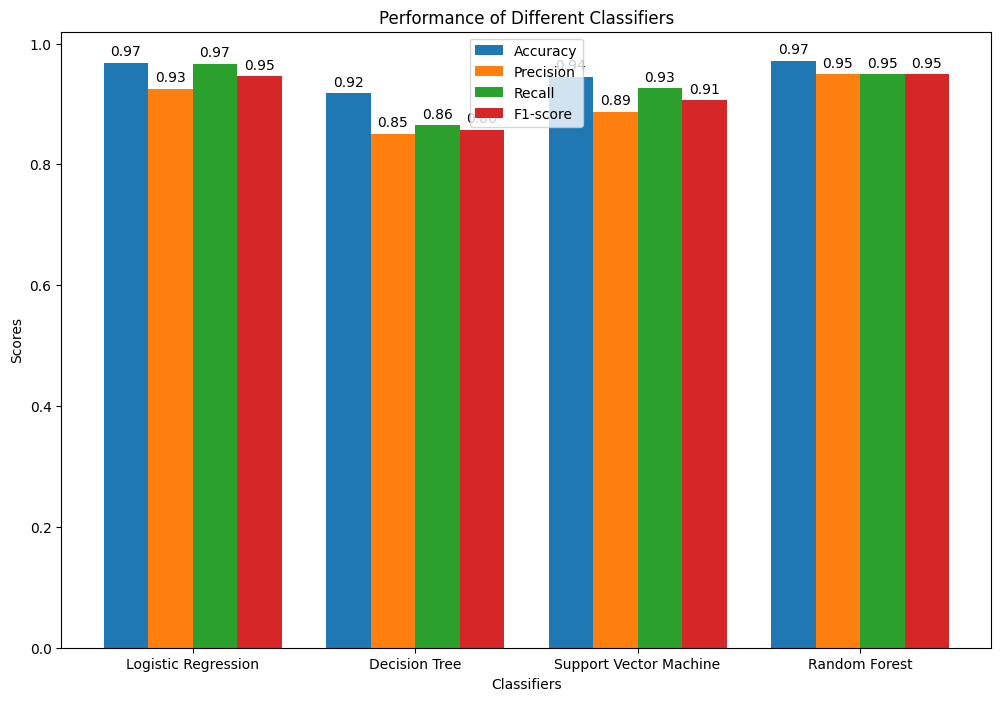

In [2]:
classifiers = [result["name"] for result in results]
test_accuracies = [result["test_accuracy"] for result in results]
test_precisions = [result["test_precision"] for result in results]
test_recalls = [result["test_recall"] for result in results]
test_f1_scores = [result["test_f1"] for result in results]

x = np.arange(len(classifiers))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 8))

rects1 = ax.bar(x - 1.5*width, test_accuracies, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, test_precisions, width, label='Precision')
rects3 = ax.bar(x + 0.5*width, test_recalls, width, label='Recall')
rects4 = ax.bar(x + 1.5*width, test_f1_scores, width, label='F1-score')

ax.set_xlabel('Classifiers')
ax.set_ylabel('Scores')
ax.set_title('Performance of Different Classifiers')
ax.set_xticks(x)
ax.set_xticklabels(classifiers)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.show()
